(ode-chapter)=

# Ordinary Differential Equations (ODE)

An Ordinary Differential Equation (ODE) is an equation which contains the derivatives of a function of a single independent variable. ODEs occur in many applications, so it is important that we are able to solve them. A simple ODE can be solved using analytical methods such as integration and Laplace transforms, however the vast majority of ODEs used in the real world cannot be solved using analytical methods which is why we need a numerical approach.

````{prf:definition} Ordinary Differential Equation

An Ordinary Differential Equation (ODE) is an equation of the form

$$ y^{(n)}(t) = f(t, y(t), y'(t), y''(t), \ldots, y^{(n-1)}(t)), $$

where $t$ is an independent variable, $y(t)$ is a differentiable function and $y'(t)$, $y''(t)$ etc. are derivatives of $y(t)$..
````

It is common to express the function $y(t)$ as $y$ for brevity. The solution of an ODE is the function $y(t)$ that satisfies the ODE over the domain of $t$. For example, consider the following ODE

```{math}
:label: simple-ode-equation
y' = y, 
```

where $t \in \mathbb{R}$. Rewriting this using Leibniz notation and integrating both sides we have

$$ \begin{align*}
    \frac{\mathrm{d} y}{\mathrm{d} t} & = y \\
    \frac{\mathrm{d} y}{y} &= \mathrm{d} t \\
    \int \frac{1}{y} \mathrm{d} y &= \int 1 \mathrm{d} t \\
    \ln (y) + c_1 &= t + c_2 \\
    \ln (y) &= t + c_1 + c_2, \\
\end{align*} $$

where $c_1$ and $c_1$ are some constants. Let $c = c_1 + c_2$ then

$$ \begin{align*}
    y &= e^{t + c},
\end{align*} $$

The solution can be verified by differentiating $y$ and check that it satisfies the original ODE. This solution has been plotted for various values of the constant $c$ in {numref}`ode-plot-figure`. Note that there are an infinite number of solutions since $c$ can be any value. 

```{glue:figure} ode_plot
:name: ode-plot-figure
:figwidth: 600

Plots of some of the possible solution to the ODE $y' = y$.
```

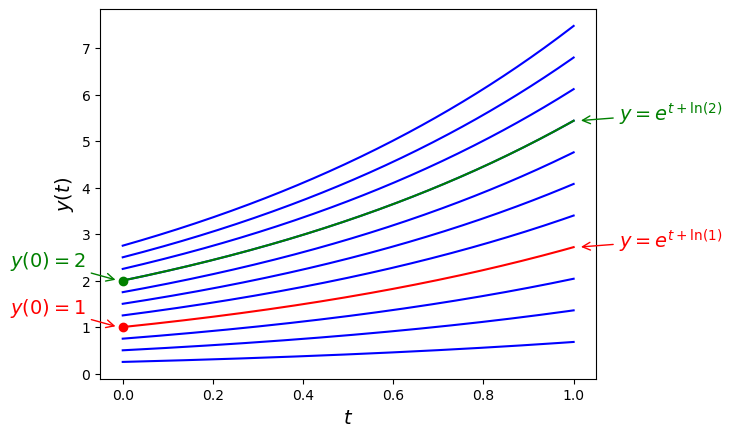

In [11]:
import numpy as np
import matplotlib.pyplot as plt

from myst_nb import glue

t = np.linspace(0, 1, 200)
fig, ax = plt.subplots()
for i in range(1, 12):
    if i == 4:
        continue
    plt.plot(t, np.exp(t + np.log(i*0.25)), "b")

plt.plot(t, np.exp(t), "r")
plt.plot(t, np.exp(t + np.log(2)), "g")
plt.plot(0, 1, "ro")
plt.plot(0, 2, "go")
plt.annotate("$y(0)=1$", xy=(-0.01, 1), xytext=(-0.25, 1.3), fontsize=14, color="r",
             arrowprops=dict(arrowstyle='->',shrinkA=2, shrinkB=2, ec="r"))
plt.annotate("$y = e^{t + \ln(1)}$", xy=(1.01, np.exp(1)), xytext=(1.1, np.exp(1)), fontsize=14, color="r",
            arrowprops=dict(arrowstyle="->", shrinkA=2, shrinkB=2, ec="r"))
plt.annotate("$y(0)=2$", xy=(-0.01, 2), xytext=(-0.25, 2.3), fontsize=14, color="g",
             arrowprops=dict(arrowstyle='->',shrinkA=2, shrinkB=2, ec="g"))
plt.annotate("$y = e^{t+\ln(2)}$", xy=(1.01, np.exp(1 + np.log(2))), xytext=(1.1, np.exp(1 + np.log(2))), fontsize=14, color="g",
            arrowprops=dict(arrowstyle="->", shrinkA=2, shrinkB=2, ec="g"))
plt.xlabel("$t$", fontsize=14)
plt.ylabel("$y(t)$", fontsize=14)
plt.show()

glue("ode_plot", fig, display=False)

However, if we know that the value of the solution $y$ for some $t$ then we can calculate $c$. For example, if the solution to the ODE in equation {eq}`simple-ode-equation` is known to be $y(0) = y_0$ then

$$ \begin{align*}
    y_0 &= e^{0 + c} = e^c \\
    \therefore c &= \ln(y_0)
\end{align*} $$

so the ODE has the solution

$$ \begin{align*}
    y &= e^{t + \ln(y_0)}.
\end{align*} $$

Different values of $y_0$ in the initial solution $y(0)=y_0$ give different unique solutions to the ODE. Problems of this type are known as **Initial Value Problems (IVP)**.

````{prf:definition} Initial value problem
:label: ivp-definition

An Initial Value Problem (IVP) is an ODE where the initial solution at the lower boundary of the domain is known. For example,

$$ \begin{align*}
    y' = f(t,y), \qquad t \in [t_0, t_{\max}], \qquad y(t_0) = y_0.
\end{align*} $$

Here a first-order ODE $y'=f(t,y)$ is defined over the domain $t\in [t_0 , t_{\max}]$ and the initial solution $y(t_0)$ is the known value $y_0$. 
````

For most real world practical applications initial value problems cannot be solved using analytical methods so instead we use numerical methods to approximate the solution. These notes will cover a common class of numerical methods used to solve initial value problems called Runge-Kutta methods.